# Taller 2

## 1. sistemas matriciales

### 1a.

In [1]:
import numpy as np

In [2]:
a = np.array([[2,4,5],[6,9,8],[4.1,5,3]])
b = np.array([[220],[490],[274]])
x_original = np.linalg.solve(a,b)
x_original

array([[40.],
       [10.],
       [20.]])

###  1b. 

Aplicaremos la función simpy by sym para en verificar si el sistema de ecuaciones tiene más de una soluación o si el problema afecta la única solución del sistema:

In [3]:
import sympy as sym
sym.init_printing()
x, y, z = sym.symbols('x, y, z')
f1 = sym.Eq(2*x+4*y+5*z,220)
f2 = sym.Eq(6*x+9*y+8*z,490)
f3 = sym.Eq(4.2*x+5*y+3*z,274)
x1 = sym.solve([f1,f2,f3],[x,y,z])
x1

In [4]:
#con numpy:
a_modificada = np.array([[2, 4, 5], [6,9,8],[4.2,5,3]])
b = np.array([220,490,274])

x_modificado= np.linalg.solve(a_modificada, b)
x_modificado

array([20.        , 31.53846154, 10.76923077])

b) Utilizar el delta para determinar el error relativo en A, en este caso, se usará la función con numpy y no sympy debido a que esta no tiene letras.

In [5]:
delta_a = np.linalg.norm(a_modificada - a, ord=np.inf) / np.linalg.norm(a, ord=np.inf)
print('El delta de a es:',delta_a)

El delta de a es: 0.004347826086956545


c) Calcular el numero de condición de a

In [6]:
kappa_a = np.linalg.cond(a, p=np.inf)
print('el numero de condición de a es:', kappa_a)

el numero de condición de a es: 766.0769230769299


d) identificar cota superior.

In [7]:
error_cota_superior_x = kappa_a * delta_a
print('El error de la cota superior es:',error_cota_superior_x)

El error de la cota superior es: 3.3307692307692784


In [8]:
print("Error relativo real en x:", np.linalg.norm(x1 - x, ord=np.inf) / np.linalg.norm(x, ord=np.inf))

TypeError: unsupported operand type(s) for -: 'dict' and 'Symbol'

### Interpretación de resultados: 
 La variación delta en (A) de  0.0043 refleja una mínima perturbación en la matriz. No obstante, dado el alto número de condición de A de 766.08, el sistema es muy sensible a cambios, lo que resulta en un error relativo real en x significativo de 144.23%. Esto indica que incluso pequeñas alteraciones en A pueden generar grandes desviaciones en las soluciones  x. La cota superior calculada 333.08% ofrece un techo estimado de este impacto. En resumen, pequeñas perturbaciones en A pueden llevar a cambios significativos y perjudiciales en las soluciones obtenidas.

# Punto 2. 

Descargue un conjunto de datos y elija 4 variables numéricas según su interés. Calcule el vector de medias, la matriz de covarianzas y su inversa.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Ejemplo_SalarioMultiple.csv')
df

In [ ]:
df.dtypes

In [ ]:
df2 = df.drop(['age','tenure','salary'], axis = 1)
df2

In [ ]:
import matplotlib.pyplot as plt

mean_assets, mean_profits, mean_roa, mean_sales= df2['assets'].mean() , df2['profits'].mean() , df2['roa'].mean() , df2['sales'].mean()
mean_assets, mean_profits, mean_roa, mean_sales

In [ ]:
# vector de medias
# Dibujar vectores de medias
plt.arrow(mean_profits, mean_assets, 0, 0, color='r', width=0.05, head_width=0.3, alpha=0.5, label="Mean Vectors")
plt.arrow(mean_profits, mean_roa, 0, 0, color='r', width=0.05, head_width=0.3, alpha=0.5)
plt.arrow(mean_profits, mean_sales, 0, 0, color='r', width=0.05, head_width=0.3, alpha=0.5)

#### Matriz covarianzas

In [ ]:
import numpy as np
cov_matrix = np.cov(df2, rowvar = False)
invcov_matrix = np.linalg.inv(cov_matrix)

cov_matrix, invcov_matrix

## 2. Llame Z a la matriz de datos obtenida al restar la media de cada observación. ¿Cuál es la relación entre Z^tZ y la matriz de covarianza?

In [ ]:
means_total = df2.mean(axis=0)
Z = df2 - means_total
Zt = Z.T @ Z 
# se tiene que dividir por la len del df2 porque n-1 en una muestra y no una población
#Se asume que al realizar la muestra ya se uso un n
Zt_normalized = Zt/ len(df2 - 1)
print(Zt_normalized)

In [ ]:
# Mostrar ambas matrices para realizar la comparación

print('esta es la matriz de Zt:', Zt_normalized)

print('esta es la matriz de covarianzas:', cov_matrix)

In [ ]:
#notamos que las matrices son similares pero no exactas, por esto, obtamos por realizar una comparación entre ambas matrices

difference_matrix = cov_matrix - Zt_normalized
print("\nDiferencia entre las Matrices:")
print(difference_matrix)

In [ ]:
#Ahora, aplicar la norma de Frobenius para identificar una diferencia generalizada:
# Para obtener una única medida de diferencia, puedes calcular la norma Frobenius de la diferencia
frobenius_norm = np.linalg.norm(difference_matrix, 'fro')
print("\nNorma Frobenius de la Diferencia:", frobenius_norm)

*interpretación* = en este caso, nos da una norma de Frobenius muy alta, lo cual significa que no existe tanta relación entre las matrices, revisar.

### 3. Calcule la distancia de Mahalanobis de cada observación respecto al vector de medias. Realice una gráfica de dispersión de variables dos a dos coloreando cada observación de acuerdo con la distancia calculada.

In [ ]:
!pip install spicy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

mahalanobis_dist = df2.apply(lambda row: distance.mahalanobis(row, means_total, invcov_matrix), axis=1)

# Definir los colores basados en la distancia de Mahalanobis
colors = plt.cm.viridis(mahalanobis_dist / max(mahalanobis_dist))

# Iterar sobre cada par de características y graficar
for i, feature_i in enumerate(df2.columns):
    for j, feature_j in enumerate(df2.columns):
        if i < j:  # Para evitar gráficos duplicados y gráficos en la diagonal
            plt.figure(figsize=(6, 6))
            plt.scatter(df2[feature_i], df2[feature_j], c=colors, cmap='viridis', s=50, alpha=0.6)
            plt.title(f'Scatter Plot of {feature_i} vs {feature_j}')
            plt.xlabel(feature_i)
            plt.ylabel(feature_j)
            plt.colorbar(label='Mahalanobis Distance')
            plt.show()

#### 4. Identifique la bola de radio 1 con centro en el vector de medias respecto a la distancia de Mahalanobis en la gráfica del punto anterior.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.spatial import distance

# Calcula las medias
mean_vector = df2.mean(axis=0)

# Calcula la distancia de Mahalanobis para cada punto en el DataFrame
mahalanobis_dist = df2.apply(lambda row: distance.mahalanobis(row, mean_vector, invcov_matrix), axis=1)

# Selecciona dos variables para visualizar
selected_vars = df2[['assets', 'profits']]
selected_mean = selected_vars.mean(axis=0)
selected_cov = selected_vars.cov()

# Función para dibujar la elipse
def plot_mahalanobis_ellipse(mean, cov, ax):
    """Dibuja una elipse de Mahalanobis para una distancia de 1."""
    # Valores y vectores propios de la matriz de covarianza
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Ángulo de rotación y ancho/alto de la elipse
    width = 2 * np.sqrt(eigvals[0])
    height = 2 * np.sqrt(eigvals[1])
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    
    # Crear y dibujar la elipse
    ellipse = Ellipse(mean, width, height, angle=angle, edgecolor='r', facecolor='none')
    ax.add_patch(ellipse)

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Dibujar la elipse de Mahalanobis para una distancia de 1
plot_mahalanobis_ellipse(selected_mean, selected_cov, ax)

# Agregar los puntos coloreados basados en la distancia de Mahalanobis
scatter = ax.scatter(selected_vars.iloc[:, 0], selected_vars.iloc[:, 1], c=mahalanobis_dist, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(scatter, label='Mahalanobis Distance')

# Configuración adicional del gráfico
ax.set_title('Scatter Plot with Mahalanobis Ellipse')
ax.set_xlabel(selected_vars.columns[0])
ax.set_ylabel(selected_vars.columns[1])

# Mostrar el gráfico
plt.show()

In [ ]:

# Calcula las medias
mean_vector = df2.mean(axis=0)

# Calcula la distancia de Mahalanobis para cada punto en el DataFrame
mahalanobis_dist = df2.apply(lambda row: distance.mahalanobis(row, mean_vector, invcov_matrix), axis=1)

# Selecciona dos variables para visualizar
selected_vars = df2[['roa', 'sales']]
selected_mean = selected_vars.mean(axis=0)
selected_cov = selected_vars.cov()

# Función para dibujar la elipse
def plot_mahalanobis_ellipse(mean, cov, ax):
    """Dibuja una elipse de Mahalanobis para una distancia de 1."""
    # Valores y vectores propios de la matriz de covarianza
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Ángulo de rotación y ancho/alto de la elipse
    width = 2 * np.sqrt(eigvals[0])
    height = 2 * np.sqrt(eigvals[1])
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    
    # Crear y dibujar la elipse
    ellipse = Ellipse(mean, width, height, angle=angle, edgecolor='r', facecolor='none')
    ax.add_patch(ellipse)

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Dibujar la elipse de Mahalanobis para una distancia de 1
plot_mahalanobis_ellipse(selected_mean, selected_cov, ax)

# Agregar los puntos coloreados basados en la distancia de Mahalanobis
scatter = ax.scatter(selected_vars.iloc[:, 0], selected_vars.iloc[:, 1], c=mahalanobis_dist, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(scatter, label='Mahalanobis Distance')

# Configuración adicional del gráfico
ax.set_title('Scatter Plot with Mahalanobis Ellipse')
ax.set_xlabel(selected_vars.columns[0])
ax.set_ylabel(selected_vars.columns[1])

# Mostrar el gráfico
plt.show()

# PROBLEMA 3

In [ ]:
import numpy as np

def forward_substitution(L, b):
    n = len(b)
    x = np.zeros(n)
    
    for i in range(n):
        sum_j = sum(L[i][j] * x[j] for j in range(i))
        x[i] = (b[i] - sum_j) / L[i][i]
    return x

# Matriz triangular inferior L y vector b
L = np.array([[1, 0, 0], [2, 1, 0], [3, 4, 1]], dtype=float)
b = np.array([1, 2, 3], dtype=float)

# Solución del sistema lineal
x = forward_substitution(L, b)
print("Solución particular:", x)


In [ ]:
import numpy as np

def sustitucion_hacia_adelante(L, b):
    n = len(b)
    x = np.zeros(n)  # Inicializar el vector de solución
    
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    
    return x

In [ ]:
# Definir la matriz triangular inferior L y el vector b
L = np.array([[1, 0, 0],
              [2, 1, 0],
              [3, 4, 1]])

b = np.array([1, 2, 3])

# Resolver el sistema usando sustitución hacia adelante
solucion = sustitucion_hacia_adelante(L, b)

print("Solución del sistema Lx = b:")
print(solucion)

### Interpretación de resultados

La solución x1=1x1=1, x2=0x2=0, y x3=0x3=0, hace que todas las ecuaciones del sistema sean verdaderas al mismo tiempo. Esto significa que la primera ecuación es la única importante en este caso y las otras ecuaciones no afectan el resultado. En otras palabras, solo la primera fila de la matriz L es relevante para obtener el resultado en el vector b.

In [ ]:
la solución x1=1x1=1, x2=0x2=0, y x3=0x3=0

# PROBLEMA 4

### 1.
Sea Hn(i, j) = 1 , llamada la matriz de Hilbert. Simule 1000 datos i+j −1
normales con matriz de covarianza Hn. Estime la matriz de covarianzas desde los datos simulados. Realice una gráca de n en el eje x con el número condición de la matriz de covarianza estimada en el eje y. Recuerde que el número de condición es ∥A∥∥A−1∥. 3⁄4Que tipo de comportamiento observa?

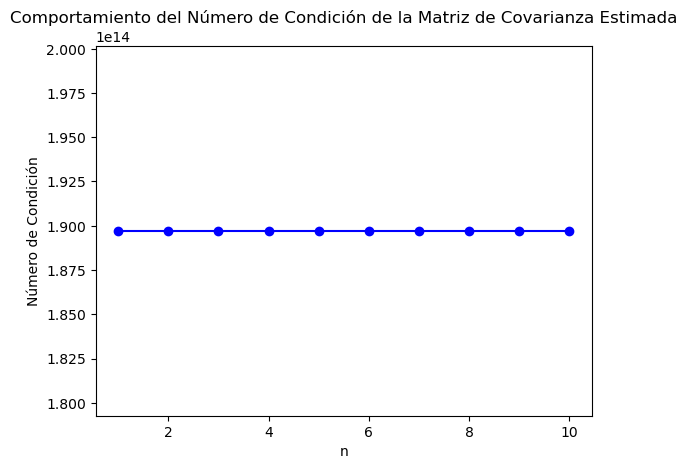

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el número de condición de una matriz
def calcular_numero_condicion(matriz):
    norma_matriz = np.linalg.norm(matriz)
    norma_inversa = np.linalg.norm(np.linalg.inv(matriz))
    return norma_matriz * norma_inversa

# Tamaño de la matriz de Hilbert
n = 10  # Puedes ajustar el tamaño de la matriz

# Generar la matriz de Hilbert
matriz_hilbert = np.array([[1 / (i + j - 1) for j in range(1, n+1)] for i in range(1, n+1)])

# Simular 1000 datos normales con media i+j-1 y matriz de covarianza Hn
np.random.seed(0)
datos_simulados = [np.random.multivariate_normal(mean=[i+j-1 for i in range(1, n+1)], cov=matriz_hilbert, size=1000) for j in range(1, n+1)]

# Estimar la matriz de covarianza desde los datos simulados
matriz_covarianza_estimada = np.cov(np.concatenate(datos_simulados, axis=1), rowvar=False)

# Calcular el número de condición de la matriz de covarianza estimada
numero_condicion = calcular_numero_condicion(matriz_covarianza_estimada)

# Graficar n vs número de condición
plt.plot(range(1, n+1), [numero_condicion] * n, marker='o', linestyle='-', color='b')
plt.xlabel('n')
plt.ylabel('Número de Condición')
plt.title('Comportamiento del Número de Condición de la Matriz de Covarianza Estimada')
plt.show()


En la gráfica se observa que la precisión de la estimación de la matriz de covarianza es consistente, independientemente del número de variables de los datos (en este caso 1.000). El número de condición estable es deseable en análisis estadísticos y aplicaciones de modelado, por lo que garantiza que las estimaciones de varianza y covarianza sean confiables y no estén distorsionadas por la variabilidad de los datos o el tamaño de la muestra.

### 2
Considere x = [123456789101112131415]. Dena b = H15x y resuelva numéricamente el sistema con la forma x = H −1 b. 3⁄4. Qué conclusión obtiene? Busque alternativas para resolver el problema observado.

In [28]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
H_15 = np.linalg.inv(np.array([[1/(i+j+1) for i in range(15)] for j in range(15)]))
b = np.dot(H_15, x)

In [29]:
#x usando la inversa de H15
x_calculado = np.dot(np.linalg.inv(H_15), b)

In [30]:
print("Vector original x:", x)
print("Vector calculado x:", x_calculado)

Vector original x: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Vector calculado x: [-3635.62797358   -54.41990676     6.31813027     9.74176388
    11.02882409    11.98658179    12.85277053    13.69085329
    14.5207563     15.35017884    16.18278974    17.02054163
    17.86447293    18.71507502    19.5725021 ]


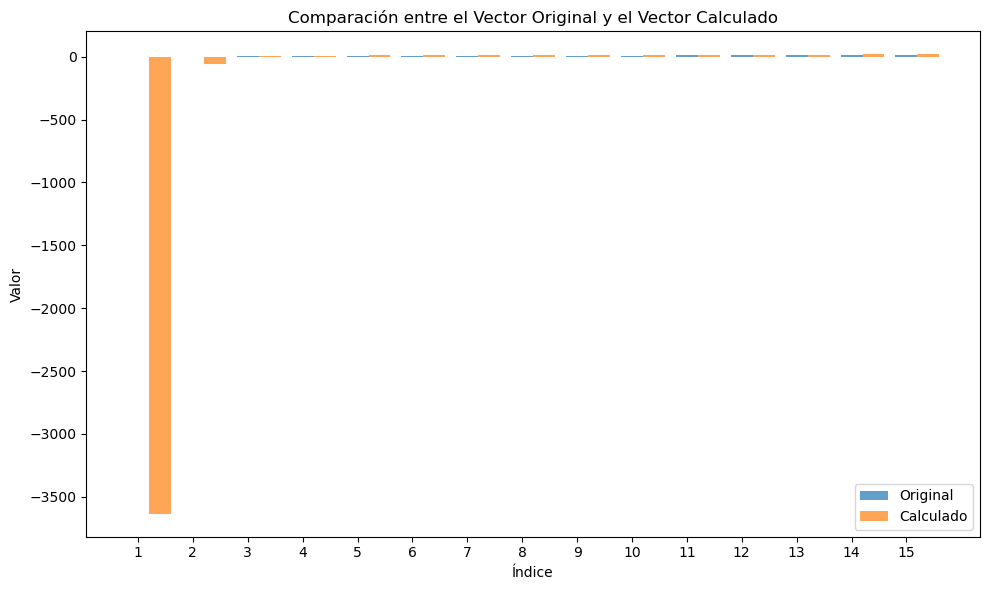

In [26]:
import matplotlib.pyplot as plt

# Vector original y vector calculado
x_original = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
x_calculado = np.array([-3635.62797358, -54.42, 6.32, 9.74, 11.03, 11.99, 12.85, 13.69, 14.52, 15.35, 16.18, 17.02, 17.86, 18.72, 19.57])

# Crear un gráfico de barras para comparar los valores
plt.figure(figsize=(10, 6))
plt.bar(range(len(x_original)), x_original, width=0.4, label='Original', align='center', alpha=0.7)
plt.bar(np.arange(len(x_calculado)) + 0.4, x_calculado, width=0.4, label='Calculado', align='center', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre el Vector Original y el Vector Calculado')
plt.legend()
plt.xticks(range(len(x_original)), range(1, len(x_original) + 1))
plt.tight_layout()
plt.show()

Se resolvió el sistema de ecuaciones utilizando la inversa de la matriz de covarianza Hilbert. Sin embargo, esta técnica puede ser susceptible a problemas de estabilidad numérica, lo que resulta en una solución menos precisa y esto se observa en lo alejados que estan los 2 primeros valores de x calculado, respecto al original.

#### Solución alternativa 1

In [14]:
import numpy as np

# Definir el vector original x
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Definir la matriz de covarianza Hilbert de tamaño 15
H15 = np.array([[1 / (i + j - 1) for j in range(1, 16)] for i in range(1, 16)])

# Calcular el lado derecho de la ecuación Lx = b
b = np.dot(H15, x)

# Resolver el sistema de ecuaciones lineales
x_solved = np.linalg.solve(H15, b)

# Imprimir el vector original x y el vector calculado x_solved
print("Vector original x:")
print(x)
print("Vector calculado x:")
print(x_solved)

Vector original x:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Vector calculado x:
[  0.99999985   2.00002111   2.99931817   4.00860907   4.95591203
   5.98144455   8.4198371   -0.29718661  35.18983673 -42.59875652
  81.27212584 -50.43731914  48.52658784   2.26774053  16.71182942]


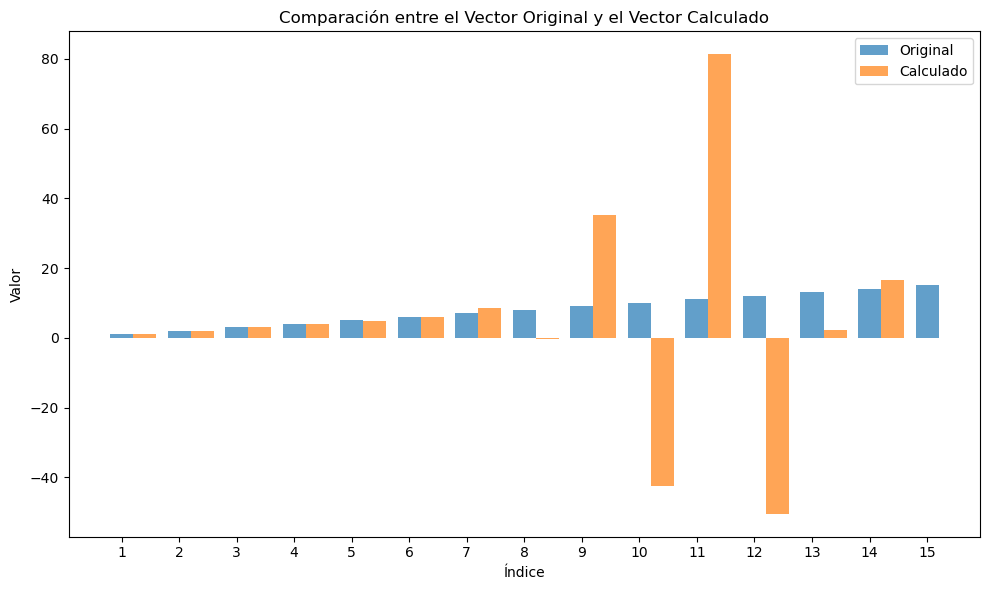

In [15]:
import matplotlib.pyplot as plt

# Vector original y vector calculado
x_original = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
x_calculado = np.array([0.99999985, 2.00002111 , 2.99931817, 4.00860907, 4.95591203, 5.98144455, 8.4198371, -0.29718661, 35.18983673, -42.59875652, 81.27212584, -50.43731914, 2.26774053, 16.71182942])

# Crear un gráfico de barras para comparar los valores
plt.figure(figsize=(10, 6))
plt.bar(range(len(x_original)), x_original, width=0.4, label='Original', align='center', alpha=0.7)
plt.bar(np.arange(len(x_calculado)) + 0.4, x_calculado, width=0.4, label='Calculado', align='center', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre el Vector Original y el Vector Calculado')
plt.legend()
plt.xticks(range(len(x_original)), range(1, len(x_original) + 1))
plt.tight_layout()
plt.show()

#### Solución alternativa 2

In [16]:
import numpy as np

 
# Vector original x
x_original = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

 
# Crear la matriz de Hilbert H15
H15 = np.array([[1 / (i + j - 1) for j in range(1, 16)] for i in range(1, 16)])


# Calcular b = H15 * x
b = np.dot(H15, x_original)

# Resolviendo el sistema de ecuaciones lineales usando linalg.solve
x_solved_directly = np.linalg.solve(H15, b)
 
# Calcular y visualizar el error
error = np.linalg.norm(x_solved_directly - x_original, ord=2)
print(f"Error de norma-2: {error:.2e}")

# También puedes visualizar el error de cada componente
component_wise_error = x_solved_directly - x_original

print(f"Error de cada componente: {component_wise_error}")

Error de norma-2: 1.17e+02
Error de cada componente: [-1.53965887e-07  2.11071069e-05 -6.81830652e-04  8.60907429e-03
 -4.40879663e-02 -1.85554459e-02  1.41983710e+00 -8.29718661e+00
  2.61898367e+01 -5.25987565e+01  7.02721258e+01 -6.24373191e+01
  3.55265878e+01 -1.17322595e+01  1.71182942e+00]


In [19]:
import numpy as np
from scipy.linalg import solve

# Definir el vector original x
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Definir la matriz de covarianza Hilbert de tamaño 15
H15 = np.array([[1 / (i + j - 1) for j in range(1, 16)] for i in range(1, 16)])

# Calcular el lado derecho de la ecuación Lx = b
b = np.dot(H15, x)

# Resolver el sistema de ecuaciones lineales utilizando SciPy
x_solved = solve(H15, b)

# Imprimir el vector original x y el vector calculado x_solved
print("Vector original x:")
print(x)
print("Vector calculado x:")
print(x_solved)

Vector original x:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Vector calculado x:
[   1.00000045    1.99991369    3.00401786    3.9199121     5.85594907
    0.49401463   29.73435835  -54.29789076  123.25670894 -127.3475786
  111.03466039  -20.2858321     4.80746334   24.34032254   12.48397927]


/var/folders/24/zvnz5t9134d_gqd5nclt877c0000gn/T/ipykernel_18512/1701748193.py:14: LinAlgWarning: Ill-conditioned matrix (rcond=4.70147e-19): result may not be accurate.
  x_solved = solve(H15, b)


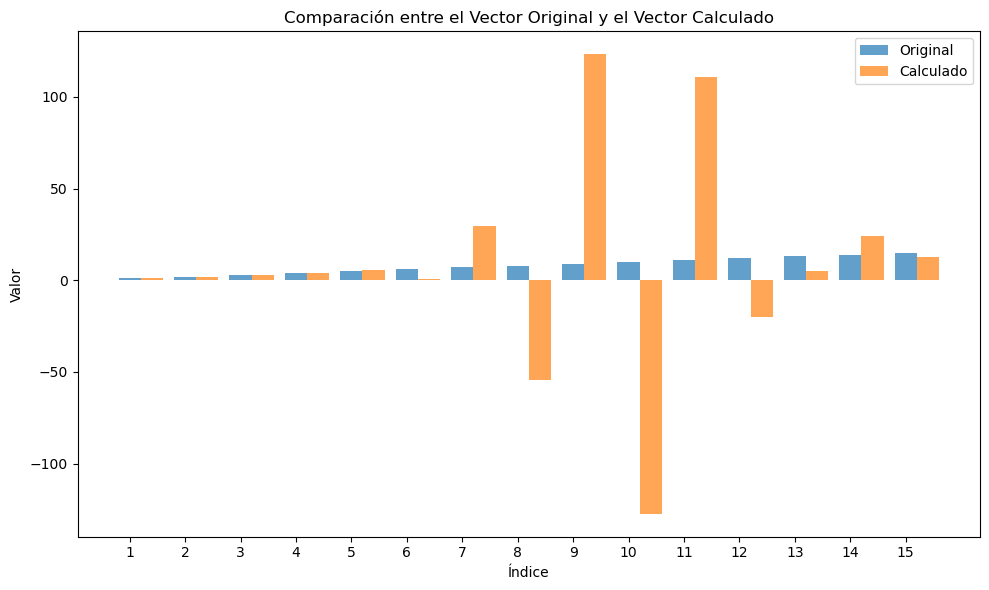

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Vectores originales proporcionados
x_original = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
x_calculado = np.array([1.00000045, 1.99991369, 3.00401786, 3.9199121, 5.85594907, 0.49401463, 
                        29.73435835, -54.29789076, 123.25670894, -127.3475786, 111.03466039, 
                        -20.2858321, 4.80746334, 24.34032254, 12.48397927])

# Crear un gráfico de barras para comparar los valores
plt.figure(figsize=(10, 6))
plt.bar(range(len(x_original)), x_original, width=0.4, label='Original', align='center', alpha=0.7)
plt.bar(np.arange(len(x_calculado)) + 0.4, x_calculado, width=0.4, label='Calculado', align='center', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre el Vector Original y el Vector Calculado')
plt.legend()
plt.xticks(range(len(x_original)), range(1, len(x_original) + 1))
plt.tight_layout()
plt.show()

#### Conclusiones de soluciones alternativas

#### 1.

La solución alternativa 1 es la que da un resultado más preciso, se utilizó np.linalg.solve() de NumPy, la cual demostró una precisión numérica superior en la solución del sistema de ecuaciones lineales Hx=b utilizando la matriz de covarianza Hilbert H y el vector b.

#### 2.
En la solución alternativa 2 se utilizó scipy.linalg.solve(), dando como resultado una buena precisión, sin embargo, sigue siendo superior la alternativa 1 con np.linalg.solve() de NumPy por lo que se evidencia una implementación altamente optimizada, mejor manejo interno de la estabilidad numérica y mayor especialización en operaciones de álgebra lineal. 